### IMPORT LIBRARIES

import libraries to quicken model building from scratch to finish

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
import datetime
from fbprophet import Prophet
from fbprophet.plot import add_changepoints_to_plot

In [2]:
covid = pd.read_csv(r"C:\Users\Ramadhina\JUPYTER_FILES\files_read\cases.csv")

In [3]:
print(covid.head(5))

       date  new_tested  acc_tested  new_confirmed  acc_confirmed  \
0  2-Mar-20         NaN         339              2              2   
1  3-Mar-20         2.0         341              0              2   
2  4-Mar-20        31.0         372              0              2   
3  5-Mar-20        16.0         388              0              2   
4  6-Mar-20        62.0         450              2              4   

   acc_negative  being_checked  isolated  new_released  acc_released  \
0           335              2         2             0             0   
1           337              2         2             0             0   
2           356             14         2             0             0   
3           371             15         2             0             0   
4           422             24         4             0             0   

   new_deceased  acc_deceased positive_rate negative_rate decease_rate  \
0             0             0         0.59%        98.82%        0.00%   
1   

### Data Exploration

To know general information of data, statistical information of data and checking if there's null in columns, my target will be acc_confirmed so since i'm experimenting with time series analysis with fbprophet then other features except the target and the date will not be used in model building thus the other than them will be ignored.

In [4]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
date                  30 non-null object
new_tested            28 non-null float64
acc_tested            30 non-null int64
new_confirmed         30 non-null int64
acc_confirmed         30 non-null int64
acc_negative          30 non-null int64
being_checked         30 non-null int64
isolated              30 non-null int64
new_released          30 non-null int64
acc_released          30 non-null int64
new_deceased          30 non-null int64
acc_deceased          30 non-null int64
positive_rate         30 non-null object
negative_rate         30 non-null object
decease_rate          30 non-null object
release_rate          30 non-null object
dailypositive_rate    30 non-null object
dtypes: float64(1), int64(10), object(6)
memory usage: 4.1+ KB


In [5]:
covid.describe()

,new_tested,acc_tested,new_confirmed,acc_confirmed,acc_negative,being_checked,isolated,new_released,acc_released,new_deceased,acc_deceased
count,28.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,232.178571,2275.300000,50.933333,398.933333,1875.000000,13.000000,346.266667,2.700000,19.500000,4.533333,33.166667
std,288.940729,2153.042645,48.962993,480.433923,1680.618954,11.110728,414.461673,3.752241,23.933457,5.624658,42.402085
min,2.000000,339.000000,0.000000,2.000000,335.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,67.250000,580.750000,3.250000,21.000000,527.250000,0.000000,21.000000,0.000000,0.000000,0.000000,0.000000
50%,136.000000,1351.000000,36.500000,153.000000,1230.500000,15.000000,138.500000,1.000000,8.500000,2.000000,6.000000
75%,309.000000,3188.000000,97.750000,658.500000,2513.000000,20.000000,575.000000,4.000000,30.000000,7.750000,53.500000
max,1439.000000,6777.000000,153.000000,1528.000000,5249.000000,37.000000,1311.000000,13.000000,81.000000,20.000000,136.000000


In [6]:
covid.isnull().sum()

date                  0
new_tested            2
acc_tested            0
new_confirmed         0
acc_confirmed         0
acc_negative          0
being_checked         0
isolated              0
new_released          0
acc_released          0
new_deceased          0
acc_deceased          0
positive_rate         0
negative_rate         0
decease_rate          0
release_rate          0
dailypositive_rate    0
dtype: int64

**CHANGING THE DATE TO FORMAT YEARS-MONTH-DAY AND MAKE IT INTO DATETIME TYPE AND SORT THE VALUES OF RECORD BY DATE**

In [7]:
dates =  [datetime.datetime.strptime(ts,'%d-%b-%y').strftime('%Y-%m-%d') 
            for ts in covid['date']]
covid['date']= pd.DataFrame({'date': dates})
covid['date'] = pd.to_datetime(covid['date'])
covid = covid.sort_values(by=['date'])

### PLOT NUMBER OF EVERY CASES

Let's see the plot of confirmed,deceased,negative and released cases of COVID-19

Text(0.5, 1.0, 'Numbers of cases')

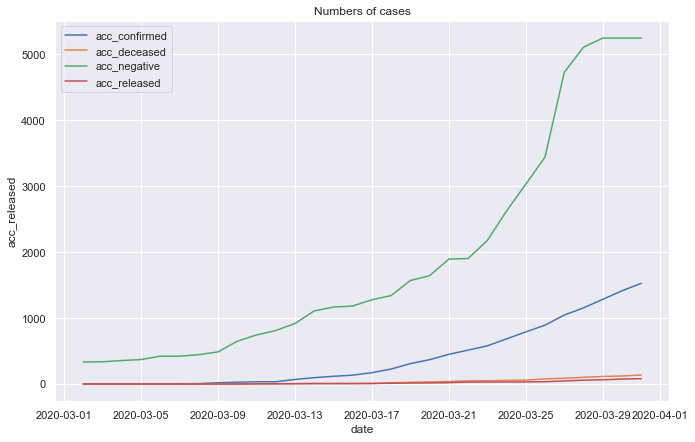

In [8]:
plt.figure(figsize=(11,7))
sns.lineplot(x=covid['date'], y=covid['acc_confirmed'])
sns.lineplot(x=covid['date'], y=covid['acc_deceased'])
sns.lineplot(x=covid['date'], y=covid['acc_negative'])
sns.lineplot(x=covid['date'], y=covid['acc_released'])
plt.legend(['acc_confirmed', 'acc_deceased', 'acc_negative', 'acc_released'],
            loc='upper left')
plt.title('Numbers of cases')

**Changing the % string in column values into decimal so i could be processed later**

In [9]:
for col in covid.columns[12:]:
    covid[col] = covid[col].str.rstrip('%').astype('float')/100.0

### MODEL BUILDING AND FITTING

I create the dataframe which only consists of date and acc_confirmed as my time series dataframe, rename it as ds and y and then normalize the target y which later this dataframe is the one will be fit into the model

In [10]:
covid_pr = covid[['date','acc_confirmed']].copy()
covid_pr.rename(columns = {'date':'ds', 'acc_confirmed':'y'},inplace= True)
covid_pr.y = np.log(covid_pr.y)

In [11]:
prt = Prophet()
prt.fit(covid_pr)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 23.


Create the future prediction for 30 days and since we log the data before to avoid negative prediction yhat and the turn them back into real data prediction by exponent them. The yhat is the predicted values and lower and upper means the lower window and the upper window of the yhat

In [12]:
future_prt = prt.make_future_dataframe(30)
forecast = prt.predict(future_prt)

### PLOTTING THE PREDICTED DISTRIBUTION VALUES WITH FBPROPHET

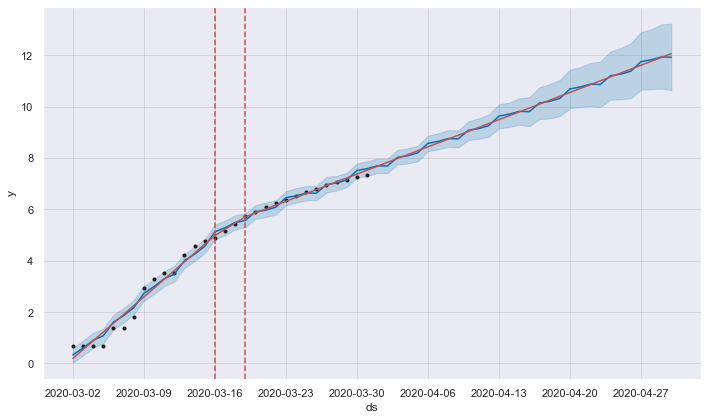

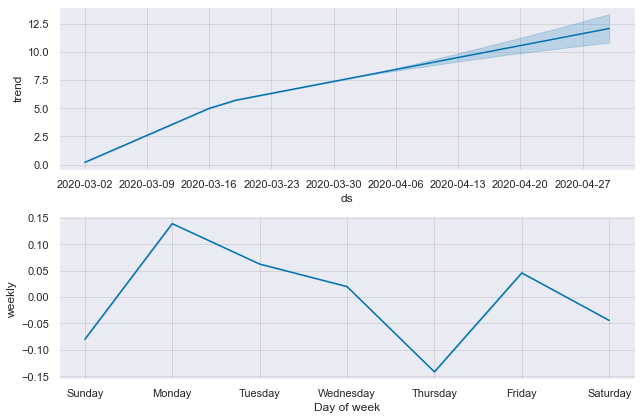

In [13]:
fig11 = prt.plot(forecast)
a = add_changepoints_to_plot(fig11.gca(), prt, forecast)
fig12 = prt.plot_components(forecast)

Now we will see the real predicted numbers of acc_confirmed starting from row 30

In [14]:
print(np.exp(forecast[['yhat', 'yhat_lower', 'yhat_upper']]))

             yhat    yhat_lower     yhat_upper
0        1.396685      1.042920       1.820114
1        1.821823      1.357372       2.429713
2        2.457967      1.847469       3.288571
3        2.944948      2.184574       3.909257
4        5.000245      3.781636       6.642651
5        6.435198      4.909972       8.659712
6        8.741065      6.723694      11.810466
7       15.320918     11.456134      20.598703
8       19.984461     14.929030      26.187550
9       26.961781     20.191304      36.540897
10      32.298953     24.279805      44.563249
11      54.823215     40.845757      71.904838
12      70.525884     53.802590      93.499452
13      95.734042     73.021610     128.298280
14     167.625725    125.802328     223.391525
15     197.769964    147.135795     260.855896
16     241.247484    185.045116     321.178866
17     261.254748    200.530487     347.348209
18     366.855343    279.076445     475.236931
19     390.401156    297.796558     527.007379
20     438.27

### PLOTTING NUMBER OF CASES OBSERVED AND PREDICTED

For easier interpretation, i will create a plot of which explains the real number of observed confirmed positive cases and number of predicted confirmed positive cases through the time

In [15]:
clear_data = forecast[['ds','yhat']].copy()
clear_data.yhat = np.exp(clear_data.yhat)

Text(0.5, 1.0, 'Predicted number of confirmed positive')

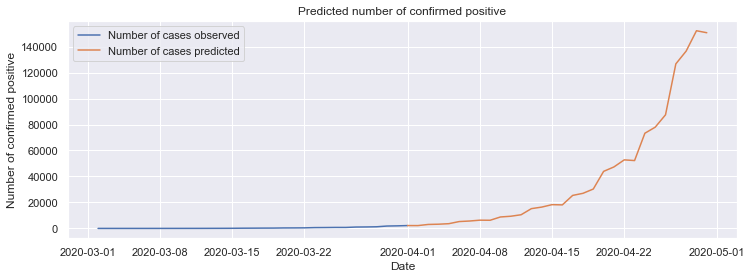

In [16]:
plt.figure(figsize=(12,4))
plt.plot(clear_data.ds[0:31],clear_data.yhat[0:31])
plt.plot(clear_data.ds[30:60],clear_data.yhat[30:60])
plt.legend(['Number of cases observed','Number of cases predicted'])
plt.xlabel("Date")
plt.ylabel("Number of confirmed positive")
plt.title("Predicted number of confirmed positive")

### EXPERIMENTING WITH HOLIDAYS

I will experiment with adding holiday based on awal puasa since usually in awal puasa people often go back to their home village or do tarawih prayer at the mosque, since the fasting start from 24 then i will make the holiday from 24 to 26. Also i will add upper window = 1 in case people extend that holiday to 27

In [17]:
awalPuasa = pd.DataFrame({
  'holiday': 'AwalPuasa',
  'ds': pd.to_datetime(['2018-04-24', '2018-04-25', '2018-04-26']),
  'lower_window': 0,
  'upper_window': 1,
})

In [18]:
prt2 = Prophet(holidays=awalPuasa,daily_seasonality=True).fit(covid_pr)
future2_prt = prt2.make_future_dataframe(periods=30)
forecast2 = prt2.predict(future2_prt)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 23.


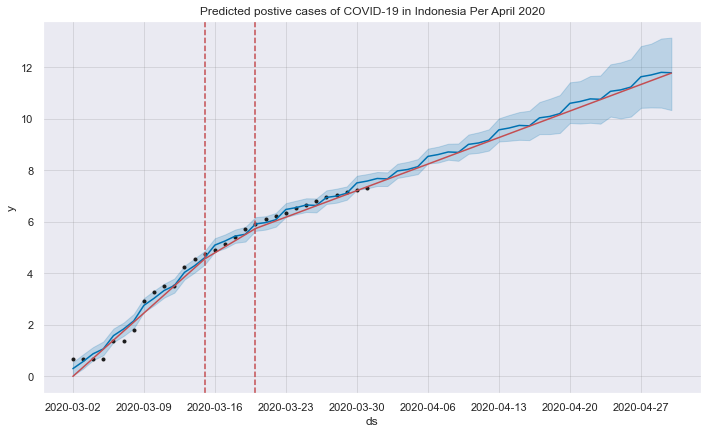

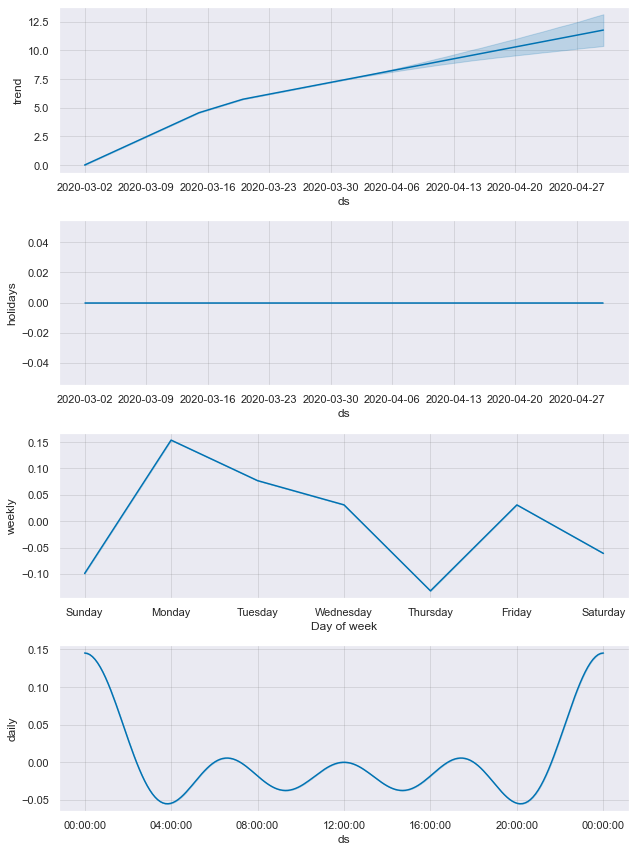

In [19]:
fig21 = prt2.plot(forecast2)
a = add_changepoints_to_plot(fig21.gca(), prt2, forecast2)
plt.title('Predicted postive cases of COVID-19 in Indonesia Per April 2020')
fig22 = prt2.plot_components(forecast2)

### CONCLUSION
1. **Holiday effect vs non holiday effect** : From the plot, it seems that there's almost no difference at all if i add holiday awal puasa or not, it makes sense since this is not the case where holiday has an effect because we're in epidemy and everybody enjoys their holiday at home so it won't change big difference in number of confirmed positive cases.
2. **About fbprophet** : fbprophet is very easy to use and the parameter is easy to understand. It's very efficient because everything is analysed by the machine automatically and it's very time saving. It's also very flexible to changes we want. I also want to note not to forget to log and exponent the target so there will be no negative predicted values.
3. **Observed predicted numbers and plot summary** : Since from the data, it's only observed in a month and it always increases it makes sense that the model predict increasing trend. From this insight, we could be more aware of how dangerous and infectivity this virus is.